In [4]:
import pandas as pd
from datetime import datetime,date,timedelta
import matplotlib.pyplot as plt
import numpy as np

In [5]:
url = 'https://raw.githubusercontent.com/open-covid-19/data/master/output/aggregated.csv'

In [6]:
dataDF = pd.read_csv(url)

In [7]:
dataDF.head(n=30)

,Date,CountryCode,CountryName,Confirmed,Deaths
0,2019-12-31,AE,United Arab Emirates,0,0
1,2020-01-01,AE,United Arab Emirates,0,0
2,2020-01-02,AE,United Arab Emirates,0,0
3,2020-01-03,AE,United Arab Emirates,0,0
4,2020-01-04,AE,United Arab Emirates,0,0
5,2020-01-05,AE,United Arab Emirates,0,0
6,2020-01-06,AE,United Arab Emirates,0,0
7,2020-01-07,AE,United Arab Emirates,0,0
8,2020-01-08,AE,United Arab Emirates,0,0
9,2020-01-09,AE,United Arab Emirates,0,0


In [88]:
sorted(dataDF['CountryName'].unique())


['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cases on an international conveyance Japan',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Cote dIvoire',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Czech republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'Estonia',
 'Ethiopia',
 'Finland',
 'France',
 'Gabon',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guinea',
 'Guyana',
 'Holy See',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kenya',
 'Kuwait',
 'Latvia',
 'Lebanon',
 'Liechtenstein',
 'Lithuania',
 'Luxembourg',
 'Malaysia',
 'Maldives',
 'Ma

In [8]:
startDate=date(2020,1,22)

In [9]:
dataDF.columns.values

array(['Date', 'CountryCode', 'CountryName', 'Confirmed', 'Deaths'],
      dtype=object)

In [10]:
Europe = ['France','Germany','Italy','UK','Spain','Belgium','Netherlands','Sweden','Denmark','Portugal','Austria',\
          'Poland','Finland','Norway','Croatia','Greece','San Marino','Iceland','Czech Republic','Slovenia','Ireland','Romania',\
         'Estonia','Hungary','Slovakia','Latvia','Luxembourg', 'Bosnia and Herzegovina','Monaco', 'Vatican City','Liechtenstein' ]


In [44]:
def GetDataFor(Country,dataDF):
    startDate=date(2020,1,22)
    if Country=='Europe':
        EuropeDf = dataDF.loc[dataDF['CountryName'].isin(Europe)]
        sumdf  = EuropeDf.groupby('Date').sum()
        vals = sumdf['Confirmed'].values
    else:
        dataDF2 = dataDF.loc[dataDF['CountryName'].str.lower().isin([Country.lower()])]
        sumdf  = dataDF2.groupby('Date').sum()
        vals = sumdf['Confirmed'].values

    startDate = datetime.strptime(sumdf.index[0], '%Y-%m-%d')
    allDates=[startDate + timedelta(days = i) for i in range(len(vals))] 
    return vals,allDates

In [13]:
EuropeDf = dataDF.loc[dataDF['CountryName'].isin(Europe)]
#EuropeDf.fillna(0, inplace=True)
#EuropeDf.head()
#vals = EuropeDf.sum(axis=0)

In [12]:
EuropeDf = dataDF.loc[dataDF['CountryName'].isin(Europe)]
EuropeDf.head(n=100)



,Date,CountryCode,CountryName,Confirmed,Deaths
200,2019-12-31,AT,Austria,0,0
201,2020-01-01,AT,Austria,0,0
202,2020-01-02,AT,Austria,0,0
203,2020-01-03,AT,Austria,0,0
204,2020-01-04,AT,Austria,0,0
...,...,...,...,...,...
438,2020-01-20,BE,Belgium,0,0
439,2020-01-21,BE,Belgium,0,0
440,2020-01-22,BE,Belgium,0,0
441,2020-01-23,BE,Belgium,0,0


In [24]:
sumdf  = EuropeDf.groupby('Date').sum()

In [26]:
sumdf.index[0]

'2019-12-31'

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     3,     3,
           3,     4,     8,    10,    15,    19,    20,    21,    24,
          24,    24,    25,    31,    31,    32,    32,    34,    34,
          34,    34,    34,    35,    35,    35,    35,    35,    49,
         111,   164,   262,   366,   463,   790,  1085,  1478,  2138,
        2395,  3251,  4101,  5446,  7121,  8937, 11310, 14537, 17065,
       21602, 27736, 34093])

In [43]:
dataDF2 = dataDF.loc[dataDF['CountryName'].str.lower().isin(['Switzerland'.lower()])]
dataDF2.head()

,Date,CountryCode,CountryName,Confirmed,Deaths
782,2019-12-31,CH,Switzerland,0,0
783,2020-01-01,CH,Switzerland,0,0
784,2020-01-02,CH,Switzerland,0,0
785,2020-01-03,CH,Switzerland,0,0
786,2020-01-04,CH,Switzerland,0,0


Test:

In [46]:
v,d = GetDataFor('china',dataDF)
print(v)
print(d[-1])
print(v.shape)
print(len(d))

[   27    27    27    44    44    59    59    59    59    59    59    59
    59    59    59    59    59    63    80   216   235   386   526   623
   882  1323  1988  2775  4528  5994  7734  9714 11809 14399 17211 20448
 24320 28047 31207 34625 37232 40206 42696 44724 59865 64021 66559 68566
 70618 72508 74258 74652 75543 76369 77016 77234 77749 78159 78598 78927
 79355 79929 80134 80261 80380 80497 80667 80768 80814 80859 80879 80908
 80932 80954 80973]
2020-03-14 00:00:00
(75,)
75


In [16]:
print(d)

[datetime.date(2020, 1, 22), datetime.date(2020, 1, 23), datetime.date(2020, 1, 24), datetime.date(2020, 1, 25), datetime.date(2020, 1, 26), datetime.date(2020, 1, 27), datetime.date(2020, 1, 28), datetime.date(2020, 1, 29), datetime.date(2020, 1, 30), datetime.date(2020, 1, 31), datetime.date(2020, 2, 1), datetime.date(2020, 2, 2), datetime.date(2020, 2, 3), datetime.date(2020, 2, 4), datetime.date(2020, 2, 5), datetime.date(2020, 2, 6), datetime.date(2020, 2, 7), datetime.date(2020, 2, 8), datetime.date(2020, 2, 9), datetime.date(2020, 2, 10), datetime.date(2020, 2, 11), datetime.date(2020, 2, 12), datetime.date(2020, 2, 13), datetime.date(2020, 2, 14), datetime.date(2020, 2, 15), datetime.date(2020, 2, 16), datetime.date(2020, 2, 17), datetime.date(2020, 2, 18), datetime.date(2020, 2, 19), datetime.date(2020, 2, 20), datetime.date(2020, 2, 21), datetime.date(2020, 2, 22), datetime.date(2020, 2, 23), datetime.date(2020, 2, 24), datetime.date(2020, 2, 25), datetime.date(2020, 2, 26), 

In [50]:
def CutData(vals, allDates,thresh):
    idx = next((i for i, x in enumerate(vals) if x>thresh), None)
    #idx = idx -1 if idx>0 else 0
    vals = vals[idx:]
    allDates = allDates[idx:]
    return vals, allDates

# Italy plotting

In [18]:
Country='Italy'

In [19]:
vals,allDates = GetDataFor(Country,dataDF)

Custom Add latest data

In [20]:
vals = np.append(vals,9172)
allDates.append(date(2020,3,9))

In [21]:
valsIt, allDatesIt = CutData(vals,allDates,200)

In [22]:
alldaysIt = range(len(allDatesIt))

/home/jochem/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


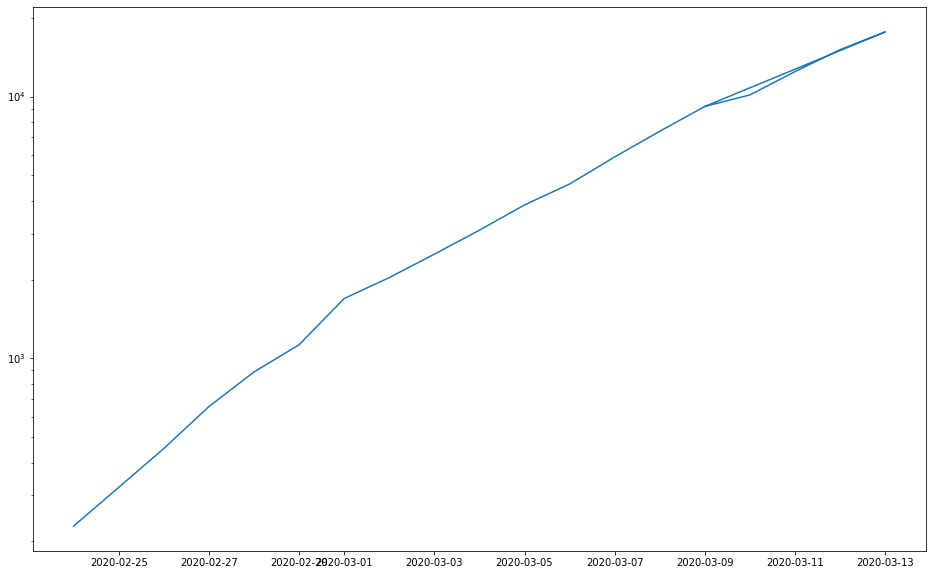

In [23]:
fig, ax = plt.subplots(figsize=(16,10))
ax.plot(allDatesIt,valsIt)
plt.yscale('log')

## Fit Linear regression

In [54]:
import sklearn.linear_model
import numpy as np

In [55]:
model = sklearn.linear_model.LinearRegression(fit_intercept=True)

In [56]:
valsItLog = [np.log(valsIt_) for valsIt_ in valsIt]

NameError: name 'valsIt' is not defined

In [27]:
x = np.c_[alldaysIt]
y = np.c_[valsItLog]

In [28]:
y

array([[5.433722  ],
       [5.77455155],
       [6.11589213],
       [6.48463524],
       [6.78897174],
       [7.02820143],
       [7.43484788],
       [7.61874238],
       [7.82484569],
       [8.03560269],
       [8.25790419],
       [8.4416072 ],
       [8.67982211],
       [8.90585118],
       [9.12391064],
       [9.22513046],
       [9.43043929],
       [9.62331058],
       [9.77905747],
       [9.12391064]])

In [29]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Plot prediction

In [30]:
LengthPred = 40

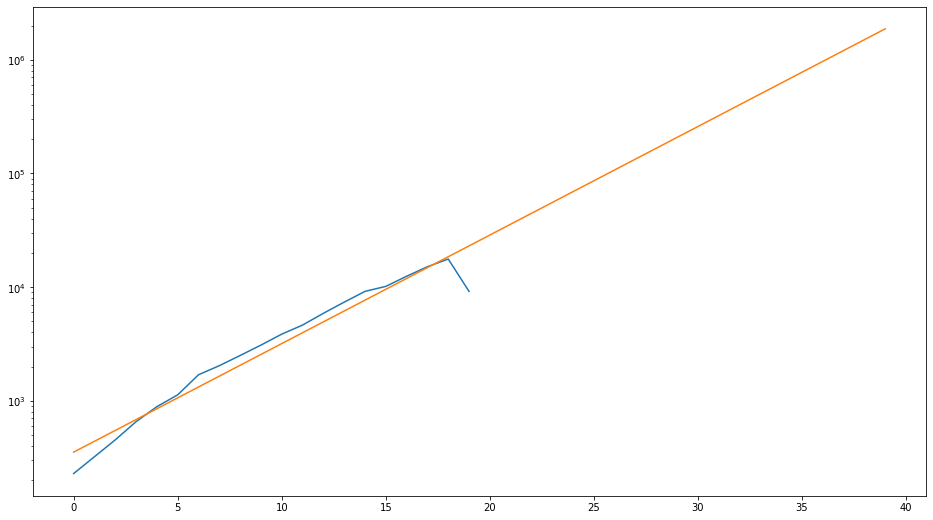

In [31]:
start = np.round(-model.intercept_[0]/model.coef_[0])
X_new = np.c_[np.arange(start,LengthPred)]
X_new = np.c_[np.arange(0,LengthPred)]
pred = model.predict(X_new)
y_new = [np.exp(val[0]) for val in pred]
Y_new = np.c_[y_new]

fig,ax = plt.subplots(figsize=(16,9))
ax.plot(alldaysIt,valsIt)

ax.plot(X_new,Y_new)
plt.yscale('log')

In [32]:
model.intercept_

array([5.8677546])

In [33]:
model.coef_

array([[0.21987297]])

In [34]:
print(start)

[-27.]


In [35]:
startFitDay = allDatesIt[0]

In [36]:
print(type(startFitDay))

<class 'datetime.date'>


In [37]:
allDatesPred = [startFitDay + timedelta(days=i) for i in range(LengthPred)]

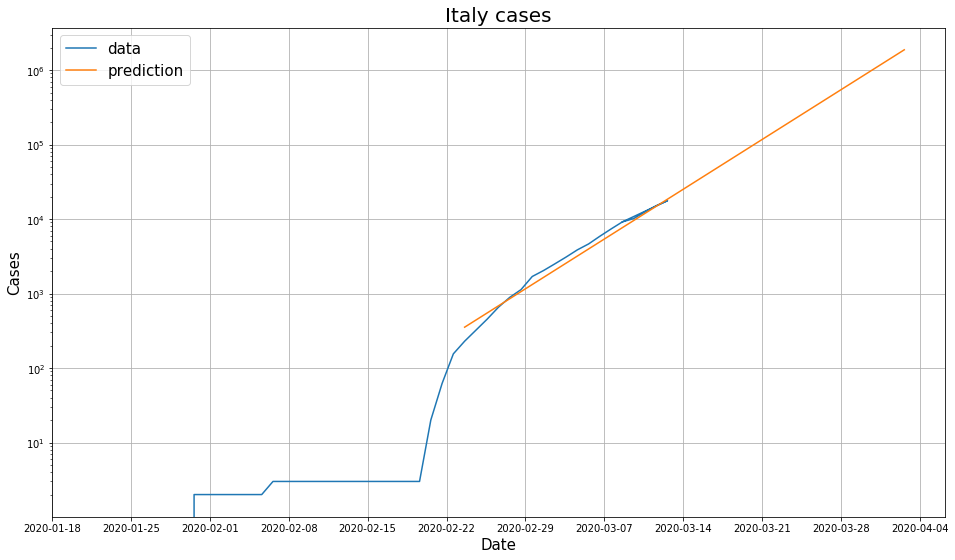

In [38]:
fig,ax = plt.subplots(figsize=(16,9))
ax.plot(allDates,vals, label = 'data')
ax.plot(allDatesPred,Y_new, label = 'prediction')
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 7))
plt.yscale('log')
plt.title(Country + ' cases', fontSize=20)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Cases',fontsize=15)
plt.legend(loc="upper left",fontsize=15)
plt.grid(True)
plt.show()


# Create Fun

In [57]:
def MakePrediction(valsCt,allDatesCt,lengthPred):
    #Create model
    model = sklearn.linear_model.LinearRegression(fit_intercept=True)

    #Convert data
    valsCtLog = [np.log(valsCt_) for valsCt_ in valsCt]
    y = np.c_[valsCtLog]
    
    #Create x-axis
    alldaysCt = range(len(allDatesCt))
    x = np.c_[alldaysCt]

    #Fit data
    model.fit(x,y)

    #Predict data
    X_new = np.c_[np.arange(0,len(x) + lengthPred)]
    pred = model.predict(X_new)
    y_new = [np.exp(val[0]) for val in pred]
    Y_new = np.c_[y_new]

    #Generate X axis
    startFitDay = allDatesCt[0]
    allDatesPred = [startFitDay + timedelta(days=i) for i in range(len(x) + lengthPred)]

    return allDatesPred,Y_new

In [64]:

def PlotPrediction(Country,Threshold,lengthPred):
    #Get data
    vals,allDates = GetDataFor(Country,dataDF)
    
    valsCt, allDatesCt = CutData(vals,allDates,Threshold)

    fig,ax = plt.subplots(figsize=(16,9))
    
    ax.plot(allDates[31:],vals[31:], 's',marker='o',label = 'data')
    print(allDates[-1])
    
    allDatesPred, Y_new = MakePrediction(valsCt[:10],allDatesCt[:10],len(valsCt)-10+lengthPred)
    
    ax.plot(allDatesPred,Y_new, '--',color='black',label = 'Exponential fit -  begin')
    
    allDatesPred, Y_new = MakePrediction(valsCt[-10:],allDatesCt[-10:],lengthPred+1)
    
    ax.plot(allDatesPred,Y_new, '-.',color='black',label = 'Exponential fit -  end')
    
    #Set x axis
    start, end = ax.get_xlim()
    ax.xaxis.set_ticks(np.arange(start, end, 4))
    
    #set yscale
    plt.yscale('log')
    
    #labels
    plt.title(Country + ' cases', fontSize=20)
    plt.xlabel('Date',fontsize=15)
    plt.ylabel('Cases',fontsize=15)
    plt.legend(loc="upper left",fontsize=15)
    
    plt.grid(linestyle='-.', linewidth='0.5', color='gray')
    
    plt.grid(True)
    plt.show()

2020-03-14 00:00:00


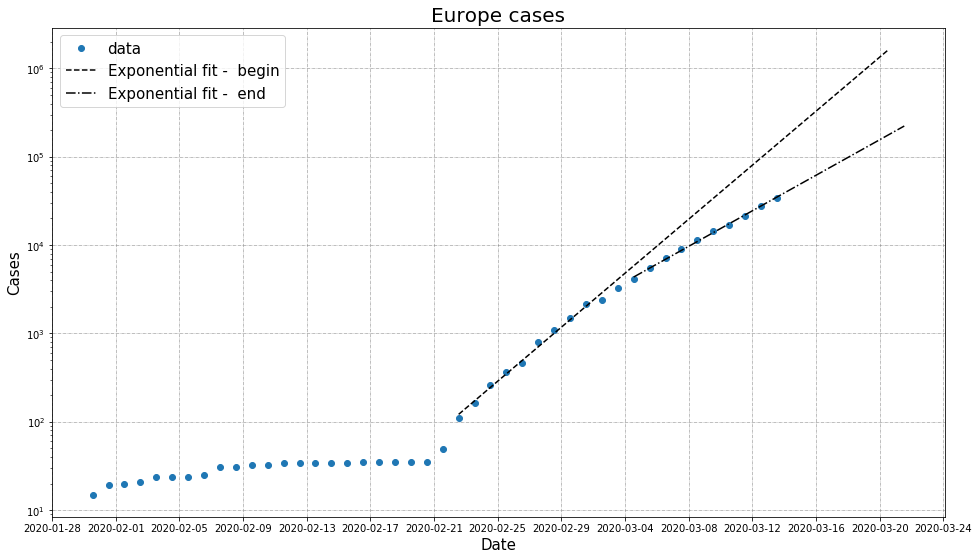

In [65]:
PlotPrediction('Europe',100,7)

De exponentiële groei van de eerste 10 dagen is hoger dan die van de laatste 10. Dat betekent dat er of veel gevallen gemist worden door verminderd testen of dat de groei al vertraagd is. In het eerste geval zitten we al aan 100 000 cases. In het tweede geval zitten we daar maandag aan...

## Overlay outbreaks

In [43]:
Countries=['Hubei','South Korea','Italy','Iran (Islamic Republic of)','France','Germany','UK','US',]

In [44]:
Countries=['Hubei','Republic of Korea','Italy','Iran (Islamic Republic of)','France','Switzerland','Netherlands','Belgium']
Countries=['Hubei','Republic of Korea','Italy','Iran (Islamic Republic of)','France','Switzerland','Netherlands','US']
Countries=['Mainland China','Republic of Korea','Italy','France','Switzerland','Netherlands','US']

In [45]:
Countries=['Mainland China','South Korea','Italy','Iran (Islamic Republic of)','France','Germany','UK','US',]

In [46]:
Countries=['Korea','Italy','Iran','France','Germany','UK','US','Switzerland','Netherlands','Belgium']

In [97]:
Countries=['South Korea','Italy','France','Germany','Switzerland','Netherlands','Belgium']

South Korea30
[  31   46   80  155  345  601  762  892 1146 1595 2022 2931 3526 4212
 4812 5328 5766 6284 6767 7134 7382 7513 7755 7869 7979 8086]
Italy30
[   79   132   229   322   400   650   888  1128  1689  1835  2502  3089
  3858  4636  5883  7375  9172 10149 12462 15113 17660]
France30
[  38   57  100  130  178  212  285  423  613  716 1126 1412 1784 2281
 2876 3661]
Germany30
[  47   57  111  129  157  196  262  400  684  847  902 1139 1296 1567
 2369 3062]
Switzerland30
[  37   57   87  209  264  332  374  490  642  854 1121]
Netherlands30
[ 38  82 128 188 265 321 382 503 614 804]
Belgium30
[ 50 109 169 200 239 267 314 399 559]


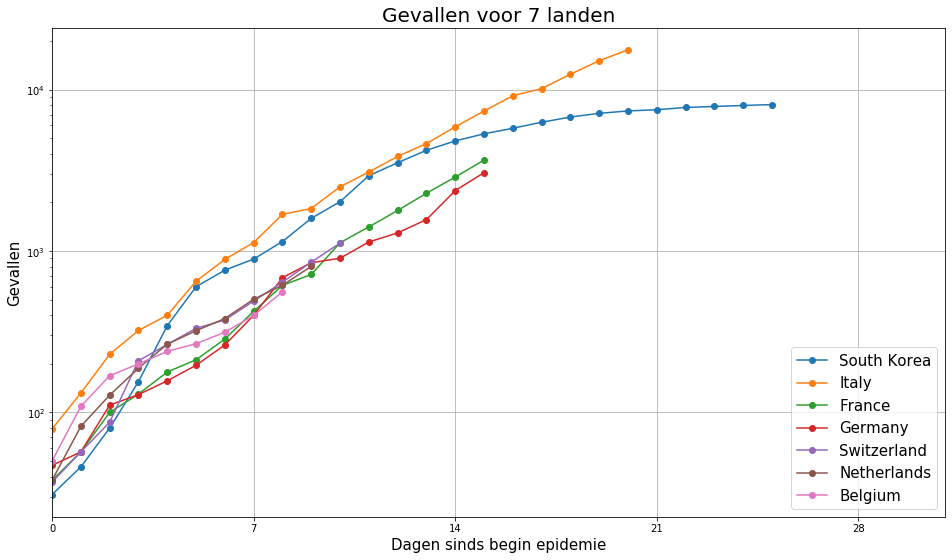

In [98]:
Thresholds=[10,30,3,15,20,20,14,100,100]

#Create figure
fig,ax = plt.subplots(figsize=(16,9))

i=0
#Loop over countries
for Country,Threshold in zip(Countries,Thresholds):
    Threshold=30

    print(Country + str(Threshold))
    vals,allDates = GetDataFor(Country,dataDF)
    
    valsCt, allDatesCt = CutData(vals,allDates,Threshold)
    
    #valsCt, allDatesCt = ExpoFit(vals,allDates)
    print(valsCt)
    
    alldaysCt = range(len(allDatesCt))
    if Country=='Mainland China' or Country == 'Hubei':
        alldaysCt = [alldaysCt_ + 4 for alldaysCt_ in alldaysCt]
    elif Country=='Republic of Korea':
        #valsCt=valsCt[1:]
        alldaysCt = range(len(allDatesCt)-0)
    elif Country=='US':
        valsCt=valsCt[2:]
        alldaysCt = range(len(allDatesCt)-2)



    ax.plot(alldaysCt,valsCt, marker='o',label = Country)
    i+=1

timeline=31

ax.xaxis.set_ticks(np.arange(0, timeline, 7))
ax.set_xlim([0,timeline])    
    
#set yscale
plt.yscale('log')

#labels
plt.title('Gevallen voor ' +str(i) + ' landen'  , fontSize=20)
plt.xlabel('Dagen sinds begin epidemie',fontsize=15)
plt.ylabel('Gevallen',fontsize=15)
plt.legend(loc="lower right",fontsize=15)
plt.grid(True)
plt.show()

## Fitting line and cutting at 0

In [91]:
def ExpoFit(vals,allDates):
    
    valsCt, allDatesCt = CutData(vals,allDates,100)
    cutsize = len(vals)- len(valsCt)
    
    valsCt = valsCt[:10] if len(valsCt)>10 else valsCt
    #Create model
    model = sklearn.linear_model.LinearRegression(fit_intercept=True)
    
    #Convert data
    valsCtLog = [np.log(valsCt_) for valsCt_ in valsCt]
    y = np.c_[valsCtLog]
    
    #Create x-axis
    alldaysCt = range(len(valsCtLog))
    x = np.c_[alldaysCt]
    #Fit data
    model.fit(x,y)
    
    start = np.round((model.intercept_[0]-2)/model.coef_[0])
    
    si_ = 0 if start>cutsize else int(cutsize-start)
    
    return vals[si_:],allDates[si_:]



In [92]:
Countries=['China','Hubei','Washington','Korea','Italy','Iran','France','Germany','Switzerland','Netherlands','US']

In [106]:
def CreateAlignedFigure(Countries):
    #Create figure
    fig,ax = plt.subplots(figsize=(16,9))

    i=0
    #Loop over countries
    for Country in Countries:
        print(Country)
        #Theshold=10
        vals,allDates = GetDataFor(Country,dataDF)

        #valsCt, allDatesCt = CutData(vals,allDates,Threshold)

        valsCt, allDatesCt = ExpoFit(vals,allDates)
        #print(valsCt)

        alldaysCt = range(len(allDatesCt))
        if 'China' in Country or 'Hubei' in Country:
            alldaysCt = [alldaysCt_ for alldaysCt_ in alldaysCt]
        #elif Country=='Republic of Korea':
            #valsCt=valsCt[1:]
        #    alldaysCt = range(len(allDatesCt)-0)
        #elif Country=='US':
        #    valsCt=valsCt[2:]
        #    alldaysCt = range(len(allDatesCt)-2)


        
        ax.plot(alldaysCt,valsCt, marker='o',label = Country)
        i+=1

    timeline=31+7

    ax.xaxis.set_ticks(np.arange(0, timeline, 7))
    ax.set_xlim([0,timeline])    

    #set yscale
    plt.yscale('log')

    #labels
    plt.title('Gevallen voor ' +str(i) + ' landen'  , fontSize=20)
    plt.xlabel('Dagen sinds begin epidemie',fontsize=15)
    plt.ylabel('Gevallen',fontsize=15)
    plt.legend(loc="lower right",fontsize=15)
    plt.grid(True)
    plt.show()

China
South Korea
Italy
Iran
Japan
United States of America


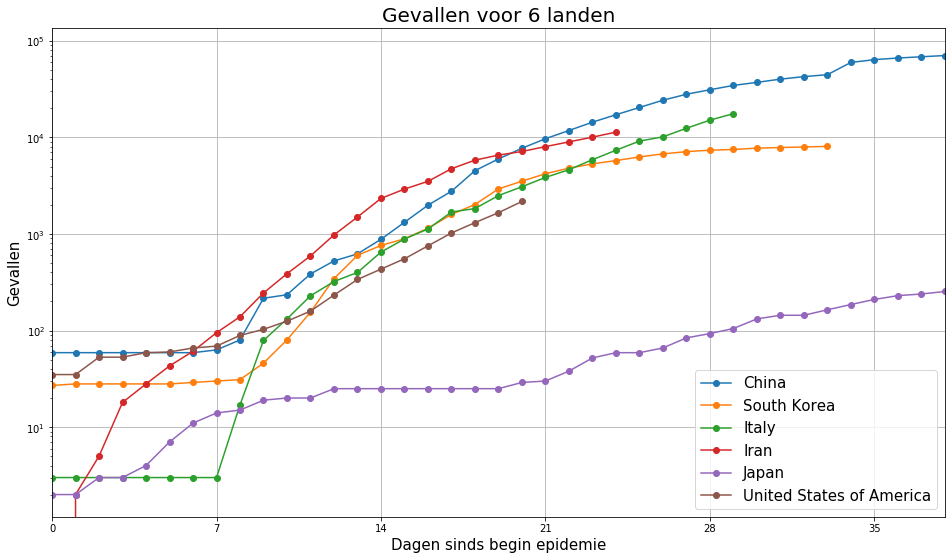

In [107]:
Countries=['China','Hubei','Korea','Italy','Iran','Japan','Washington']
Countries=['South Korea','Italy','France','Germany','Switzerland','Netherlands','Belgium']
Countries=['China','South Korea','Italy','Iran','Japan','United States of America']
CreateAlignedFigure(Countries)

China
Italy
France
Germany
Spain
Switzerland
Netherlands


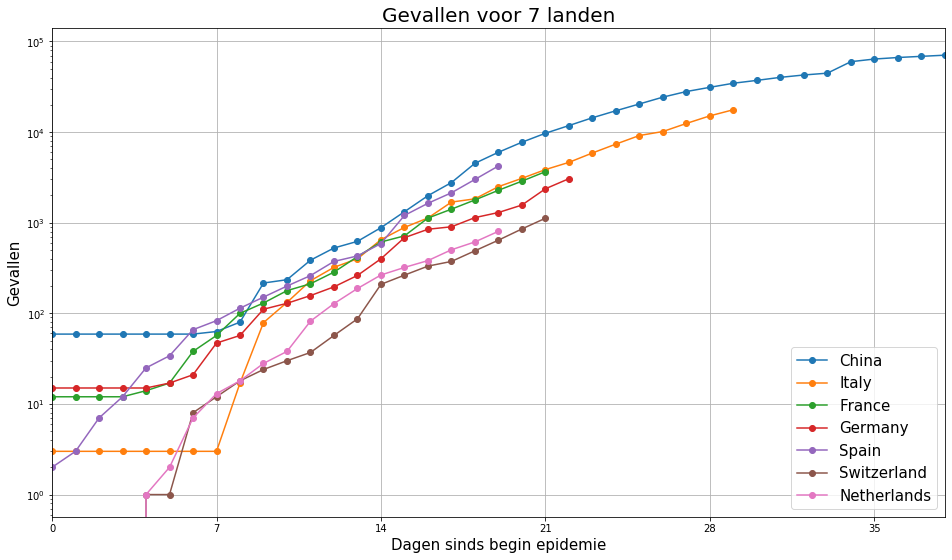

In [108]:
Countries=['China','Italy','France','Germany','Spain','Switzerland','Netherlands']
CreateAlignedFigure(Countries)

## Europe minus Italy

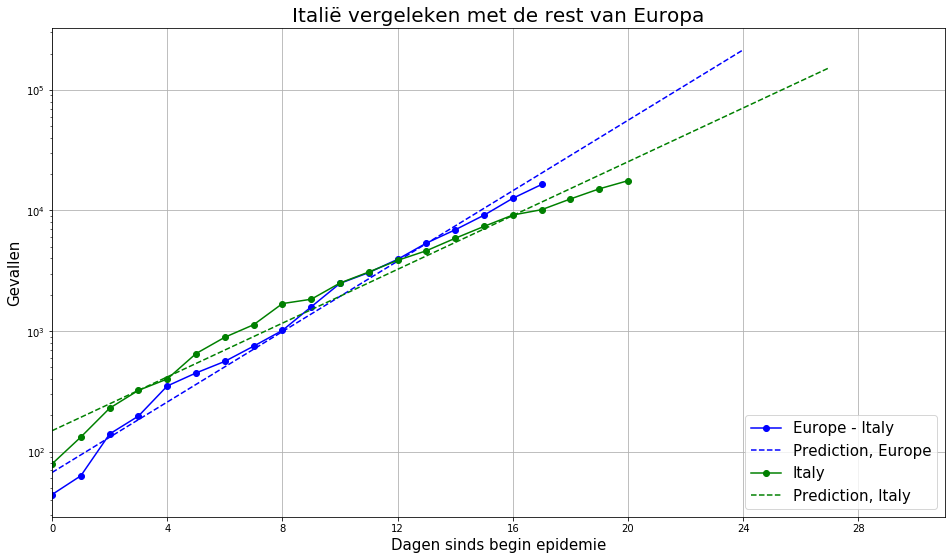

In [109]:
Threshold=40
#Create figure
fig,ax = plt.subplots(figsize=(16,9))

#Europe - Italy
valsE,allDates = GetDataFor('Europe',dataDF)
valsIt,allDatesIt = GetDataFor('Italy',dataDF)

vals = valsE-valsIt

valsCt, allDatesCt = ExpoFit(vals,allDates)
valsCt, allDatesCt = CutData(vals,allDates,Threshold)
alldaysCt = range(len(allDatesCt))

ax.plot(alldaysCt,valsCt, Color='blue',marker='o',label = 'Europe - Italy')

#Predict rest
#valsCt, allDatesCt = CutData(vals,allDates,1000)

#valsCt, allDatesCt = ExpoFit(vals,allDates)

x,y = MakePrediction(valsCt,allDatesCt,7)
x_ = range(len(x))

ax.plot(x_,y, '--',Color='blue',label = 'Prediction, Europe')

#taly
vals,allDates = GetDataFor('Italy',dataDF)

valsCt, allDatesCt = ExpoFit(vals,allDates)
valsCt, allDatesCt = CutData(vals,allDates,Threshold)
alldaysCt = range(len(allDatesCt))

ax.plot(alldaysCt,valsCt, marker='o',Color='green',label = 'Italy')

#Predict rest
#valsCt, allDatesCt = CutData(vals,allDates,1000)
x,y = MakePrediction(valsCt,allDatesCt,7)
x_ = range(len(x))

ax.plot(x_,y, '--',Color='green',label = 'Prediction, Italy')


timeline=31

ax.xaxis.set_ticks(np.arange(0, timeline, 4))
ax.set_xlim([0,timeline])    

ax.get_yaxis().get_major_formatter().labelOnlyBase = False
#set yscale
plt.yscale('log')

#labels
plt.title('Italië vergeleken met de rest van Europa'  , fontSize=20)
plt.xlabel('Dagen sinds begin epidemie',fontsize=15)
plt.ylabel('Gevallen',fontsize=15)
plt.legend(loc="lower right",fontsize=15)
plt.grid(True)
plt.show()